# 1.1 
## Natural Language Processing / Amazon Echo Reviews

Hacky inline text processing.

Finding
Cannot reject null hypothesis.
Model has high accuracy for predicting positives. Poor accuracy for negatives due to proportion in dataset.

In [115]:
import pandas as pd
import numpy as np
import nltk
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [116]:
# from https://stackoverflow.com/questions/25747985/python-reading-in-multi-column-tsv-file-with-row-numbers/52398675
df = pd.read_csv("data/amazon_alexa.tsv", sep="\t")

In [117]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [118]:
df.shape

(3150, 5)

In [119]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [120]:
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [138]:
#df[df['feedback']==0].sum()
df = pd.DataFrame({'names': vect.get_feature_names(),
               'count': np.sum(x_test_review_bow.toarray(), axis = 0)})
df = df[df['count']>50]
df

rating                                                            353
date                30-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-182...
variation           Charcoal Fabric Charcoal Fabric Charcoal Fabri...
verified_reviews    It's like Siri, in fact, Siri answers more acc...
feedback                                                            0
nlp                 like siri fact siri answer accurately alexa se...
dtype: object
rating                                                          13706
date                31-Jul-1831-Jul-1831-Jul-1831-Jul-1831-Jul-183...
variation           Charcoal Fabric Charcoal Fabric Walnut Finish ...
verified_reviews    Love my Echo!Loved it!Sometimes while playing ...
feedback                                                         2893
nlp                 love echolovedsometimes playing game answer qu...
dtype: object


In [122]:
df.insert(5, 'nlp', df['verified_reviews'])

In [123]:
df.head()

,rating,date,variation,verified_reviews,feedback,nlp
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"Sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing. My 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music


In [124]:
# Tokenize, remove stop words, and stemming from https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f
# tokenize also removing punctuation and updating to lowercase
tokenizer = RegexpTokenizer (r'\w+')

In [125]:
df['nlp'] = df['nlp'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,rating,date,variation,verified_reviews,feedback,nlp
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,"[love, my, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,"[loved, it]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"[sometimes, while, playing, a, game, you, can,..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,"[i, have, had, a, lot, of, fun, with, this, th..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,[music]


In [126]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [127]:
df['nlp'] = df['nlp'].apply(lambda x: remove_stopwords(x))
df.head()

,rating,date,variation,verified_reviews,feedback,nlp
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,"[love, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,[loved]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"[sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,[music]


In [16]:
#stemmer = PorterStemmer()
#def word_stemmer(text):
    #stem_text = ' '.join([stemmer.stem(i) for i in text])
    #return stem_text

In [18]:
#df['nlp'] = df['nlp'].apply(lambda x: word_stemmer(x))
#df.head()

,rating,date,variation,verified_reviews,feedback,nlp
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,love
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometim play game answer question correctli al...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learn dinosaur control ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


In [128]:
# lemmatizer appeared to have better output of english words

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = ' '.join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [129]:
df['nlp'] = df['nlp'].apply(lambda x: word_lemmatizer(x))
df.head()

,rating,date,variation,verified_reviews,feedback,nlp
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaur control...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


In [112]:
#vect.get_feature_names()
#df = pd.DataFrame({'names': vect.get_feature_names(),
               #'count': np.sum(x_test_review_bow.toarray(), axis = 0)})
#df = df[df['count']>50]
#df

,names,count
4,34,71
19,alexa,192
29,amazon,68
55,better,52
63,bought,67
104,day,58
107,device,93
116,dot,113
121,easy,103
122,echo,255


In [ ]:
#Analysis of preprocessed data below
#https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f

In [131]:
df[df['feedback']==1].sample(n=1)['verified_reviews'].iloc[0]

'neat tool we enjoy it with the family'

In [134]:
df[df['feedback']==0].sample(n=1)['verified_reviews'].iloc[0]

"Why do we need to buy a $100 hub to get it to work with Samsung TV's and many other devices?  I want my money back!  This thing won't even turn on my TV unless I buy another hub.  What's the point of having a hub that doesn't support half the devices out there?  DON'T buy this thing unless you want to spend another $100 on another hub.  It won't work with many of your devices.  Just by the Echo or Dot if you must but not this.  Better yet, get a Google device.  They actually understand you when you talk."

In [85]:
from sklearn.model_selection import train_test_split
data = df.copy()
y = data['feedback'].values
data.drop(['feedback'], axis = 1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)
print("Train data:", x_train.shape, y_train.shape)
print("Test data:", x_test.shape, y_test.shape)

Train data: (2205, 5) (2205,)
Test data: (945, 5) (945,)


In [93]:
len(vect.get_feature_names())

484

In [102]:
vect.get_feature_names()

['10',
 '100',
 '1st',
 '2nd',
 '34',
 '3rd',
 'ability',
 'able',
 'absolutely',
 'access',
 'account',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'advertised',
 'alarm',
 'alexa',
 'alexia',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'amazing',
 'amazon',
 'annoying',
 'another',
 'answer',
 'anything',
 'app',
 'apple',
 'apps',
 'around',
 'ask',
 'asked',
 'asking',
 'assistant',
 'audible',
 'audio',
 'available',
 'away',
 'awesome',
 'back',
 'bad',
 'basic',
 'bass',
 'battery',
 'bed',
 'bedroom',
 'best',
 'better',
 'big',
 'birthday',
 'bit',
 'blue',
 'bluetooth',
 'book',
 'bose',
 'bought',
 'brand',
 'briefing',
 'built',
 'bulb',
 'button',
 'buy',
 'buying',
 'cable',
 'call',
 'came',
 'camera',
 'cannot',
 'capability',
 'cell',
 'change',
 'channel',
 'chat',
 'check',
 'choice',
 'clear',
 'clock',
 'color',
 'come',
 'command',
 'complaint',
 'computer',
 'connect',
 'connected',
 'connecting',
 'conn

In [99]:
x_test.iloc[0]

,rating,date,variation,verified_reviews,nlp
960,5,29-Jul-18,Oak Finish,Love my Echo,love echo
1485,5,30-Jul-18,White Show,This product is even better than I imagined. I...,product even better imagined love timer settin...
2958,5,30-Jul-18,Black Dot,I love searching the Alexa skill shop on the a...,love searching alexa skill shop app useful thi...
621,1,31-May-18,Black,If you want to listen to music and have it com...,want listen music come several echo dot unit s...
2056,5,10-Jul-18,Black Plus,Personal,personal
...,...,...,...,...,...
372,5,27-Jul-18,Black,It works,work
1299,5,22-Jul-18,White Spot,Awesome cute and smart!,awesome cute smart
747,5,30-Jul-18,Charcoal Fabric,Works as you’d expect and then some. Also good...,work expect also good sound quality considerin...
346,5,28-Jul-18,Charcoal Fabric,From such a small speaker it sounds great,small speaker sound great


In [141]:
#source Aaron - TBD can I add in a check of rating for that word?
df = pd.DataFrame({'names': vect.get_feature_names(),
               'count': np.sum(x_test_review_bow.toarray(), axis = 0)})
df = df[df['count']>50]
df

,names,count
4,34,71
19,alexa,192
29,amazon,68
55,better,52
63,bought,67
104,day,58
107,device,93
116,dot,113
121,easy,103
122,echo,255


In [101]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=10)

x_train_review_bow = vect.fit_transform(x_train['nlp'])
x_test_review_bow = vect.transform(x_test['nlp'])

print('x_train_review_bow shape: ', x_train_review_bow.shape)
print('x_test_review_bow shape: ', x_test_review_bow.shape)

x_train_review_bow shape:  (2205, 484)
x_test_review_bow shape:  (945, 484)


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, ngrams_range=(1,3))

x_train_review_tfidf = vectorizer.fit_transform(x_train['nlp'])
x_test_review_tfidf = vectorizer.transform(x_test['nlp'])
print('x_train_review_tfidf shape: ', x_train_review_tfidf.shape)
print('x_test_review_tfidf shape: ', x_test_review_tfidf.shape)

x_train_review_tfidf shape:  (2205, 470)
x_test_review_tfidf shape:  (945, 470)


In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(x_train_review_bow, y_train)
y_pred = clf.predict(x_test_review_bow)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.9322751322751323


In [61]:
clf = MultinomialNB(alpha=1)
clf.fit(x_train_review_tfidf, y_train)

y_pred = clf.predict(x_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.9185185185185185


In [62]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l1')
clf.fit(x_train_review_tfidf, y_train)

y_pred = clf.predict(x_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.9216931216931217


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


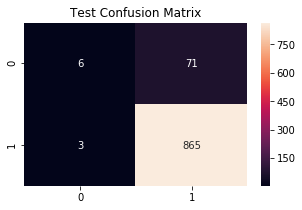

In [67]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()